# Early Data Analysis
Interpreting data from `batch_analyse.py`. The aim is to filter out the dataset to the required properties to explore potential exocomet-type transits.

In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import glob
import data
import os
from astropy.table import Table, unique
from analysis_tools_cython import *
from post_processing_tools import *
from tqdm import tqdm

In [3]:

plt.rcParams['figure.figsize'] = (11.0, 8.0)
plt.rcParams['font.size'] = 16
# plt.rcParams('xtick', labelsize='medium')
# plt.rcParams('ytick', labelsize='medium')

---

### Functions

---

## Creating DataFrame
- data used is `corrected flux`, not PCA.

In [4]:
df = get_output('output_log_xrp/output_s6_corr_v2.txt')
filtered_df = filter_df(df)

In [5]:
df['transit_prob'].unique()

array(['end', 'maybeTransit', 'point', 'artefact'], dtype=object)

`filtered_df` with `maybeTransit` only

In [6]:
filtered_df[filtered_df.transit_prob == 'maybeTransit']

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
2082,tesslc_365689125.pkl,-18.985407,-5.029466,1473.412354,1.011733,0.352100,0.018101,0.520820,-0.085778,maybeTransit
2959,tesslc_251211372.pkl,-7.817629,-5.153473,1475.828613,1.009461,0.435708,0.003232,0.937500,-0.005768,maybeTransit
3809,tesslc_80772734.pkl,-16.539957,-5.001984,1473.412354,1.163472,0.080345,0.223620,0.541659,-0.041105,maybeTransit
10235,tesslc_281718476.pkl,-11.359186,-5.190277,1476.161743,1.029048,0.329689,0.046439,0.583340,-0.003727,maybeTransit
10887,tesslc_139642420.pkl,-20.177477,-5.255358,1473.412354,1.007628,0.368122,0.012397,0.541659,-0.081544,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
2239328,tesslc_158817913.pkl,-7.081416,-5.891906,1476.370605,1.023159,0.255432,0.051754,0.541658,-0.003415,maybeTransit
2248026,tesslc_140571699.pkl,-19.933521,-5.218851,1473.412354,1.167842,0.085876,0.255589,0.541661,-0.034154,maybeTransit
2250726,tesslc_139540069.pkl,-20.464220,-5.314747,1473.412354,1.000953,0.353778,0.018392,0.520826,-0.063268,maybeTransit
2251026,tesslc_11806879.pkl,-7.118173,-5.355620,1476.453491,1.064173,0.312971,0.002840,0.583328,-0.002366,maybeTransit


---

### Raw Plot

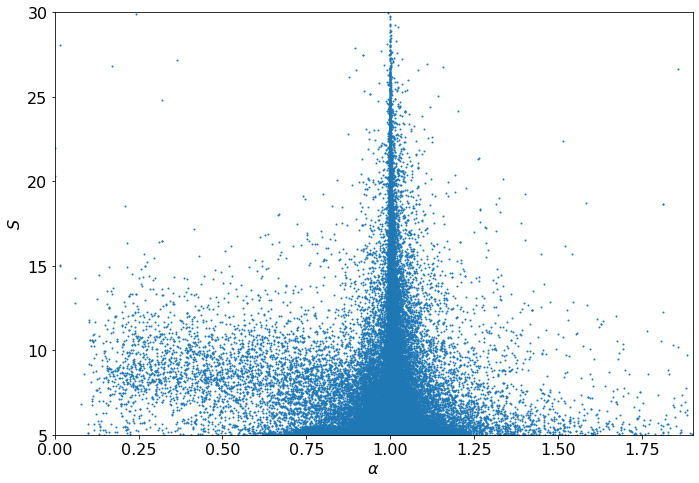

In [7]:
distribution(df.asym_score,abs(df['signal/noise']))

### `MaybeTransit` only

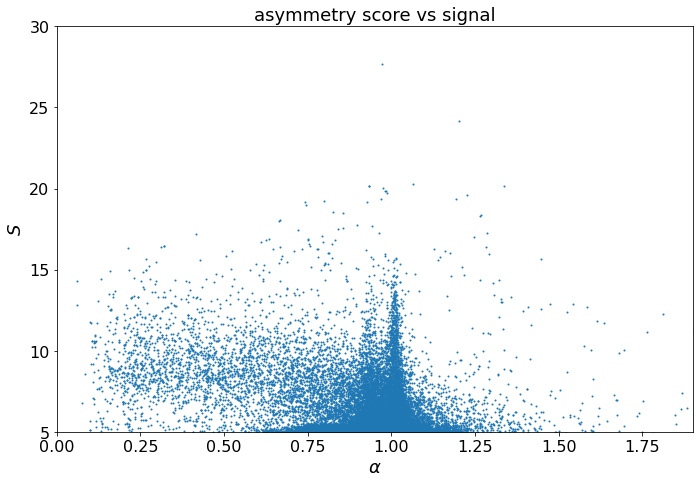

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ax.scatter(df.asym_score[df.transit_prob == 'maybeTransit'],abs(df['signal/noise'][df.transit_prob == 'maybeTransit']),s=1)
ax.set_xlim(0,1.9)
ax.set_ylim(5,30)
ax.set_xlabel('$\\alpha$',fontsize=18)
ax.set_ylabel('$S$',fontsize=18)
ax.set_title('asymmetry score vs signal',fontsize=18)
fig.tight_layout()
#rect = patches.Rectangle((1.30, 7.40), 0.25, 4, linewidth=3, edgecolor='k', facecolor='none')
#interest_region = patches.Rectangle((1.05,7),3,20, linewidth=1,edgecolor='grey',facecolor='none') # region of interest in Kennedy et al
#ax.add_patch(rect)
#ax.add_patch(interest_region)
plt.show()

Next steps - apply a feature that distinguishes false positives, EB's, etc.

---

---

### Exploring that black boxed region (S6)

Create our box with the following settings:
- `signal/noise` between 7.4 and 12
- `asym_score` between 1.3 and 1.6

In [9]:
box = df[(df['signal/noise'] <= -7.4) & (df['asym_score'] >= 1.30) & (df['transit_prob'] == 'maybeTransit') & (df['asym_score'] <= 1.60) & (df['signal/noise'] >= -12)]

In [19]:
to_import = box[['file','asym_score','signal/noise']]
#example = box['file'].tail(25)

---

In [20]:
box

,file,signal,signal/noise,time,asym_score,width1,width2,duration,depth,transit_prob
277381,tesslc_139678180.pkl,-14.038894,-7.611162,1473.370728,1.404783,0.036558,0.075760,0.062499,-31.880945,maybeTransit
388439,tesslc_302762566.pkl,-12.041709,-8.536806,1473.391602,1.319197,0.022681,0.202369,0.062499,-0.033165,maybeTransit
481739,tesslc_711920562.pkl,-17.738857,-8.794168,1476.182861,1.354627,0.048664,0.079720,0.104166,-0.016505,maybeTransit
537376,tesslc_24701760.pkl,-15.705395,-7.928107,1472.765747,1.348174,0.076669,0.005131,0.124997,-0.033609,maybeTransit
693261,tesslc_151470359.pkl,-11.754588,-7.737175,1473.391602,1.373458,0.021583,0.150573,0.062499,-0.021218,maybeTransit
787341,tesslc_337258563.pkl,-18.897236,-10.063513,1473.308350,1.595686,0.022395,0.039614,0.104166,-77.972382,maybeTransit
983726,tesslc_119752651.pkl,-21.604122,-8.762510,1476.473999,1.357545,0.044464,0.016779,0.083334,-0.000839,maybeTransit
1086334,tesslc_167308280.pkl,-13.061000,-10.019112,1475.093994,1.337949,0.003888,0.031148,0.062500,-0.109514,maybeTransit
1106935,tesslc_281920897.pkl,-14.303375,-11.578384,1473.349731,1.416868,0.049516,0.005822,0.083332,-109.353302,maybeTransit
1207598,tesslc_139678183.pkl,-14.051334,-7.610924,1473.370728,1.405970,0.036581,0.075563,0.062499,-32.004501,maybeTransit


In [21]:
sector = 6
clip = 4
path = '/storage/astro2/phrdhx/tesslcs'
mad_df = data.load_mad()

#### Saving TIC paths

In [22]:
# for i in tqdm(to_import):
#     file_paths = glob.glob(os.path.join(path,f'**/**/{i}'))[0]
#     ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/**/{i}'))[0])
#     store = import_XRPlightcurve(file_paths,sector=sector,drop_bad_points=False)[1]
#     tic = store[0]
#     ra = store[1]
#     dec = store[2]
#     to_export = [tic,ra,dec]
#     with open("weird_tic_path.txt", "a") as output:
#         output.write(file_paths+'\n')

---

In [42]:
for i in to_import['file']:
    file_paths = glob.glob(os.path.join(path,f'**/**/{i}'))[0]
    ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/**/{i}'))[0])
    table,store = import_XRPlightcurve(file_paths,sector=sector,clip=4,drop_bad_points=True)
    camera = store[4]
    tic = store[0]

    chip = store[5]

#     mad_arr = mad_df.loc[:len(table['time'])-1,f"{sector}-{camera}"]
#     sig_clip = sigma_clip(mad_arr,sigma=clip,masked=True)
#     med_sig_clip = np.nanmedian(sig_clip)
#     rms_sig_clip = np.nanstd(sig_clip)
#     mad_cut = mad_arr.values < ~sig_clip.mask 
    

#     fig, ax = plt.subplots(2,2,figsize=(10,8))
#     ax[0,1].scatter(table['time'], mad_arr, s=2)
#     ax[0,1].axhline(np.nanmedian(mad_arr), c='r')
#     ax[0,0].scatter(range(0,len(table['time'])), mad_arr, s=2)
#     ax[0,0].axhline(np.nanmedian(mad_arr), c='r')
#     ax[0,0].axhline(med_sig_clip + clip*rms_sig_clip, c='r')
#     ax[0,0].set_title(f'S{sector}-C{camera}')
#     plt.show()

In [41]:
maybetransits = df[df['transit_prob'] == 'maybeTransit']

In [44]:
random = maybetransits.head(20)

In [52]:
for i in random:
    file_paths = glob.glob(os.path.join(path,f'**/**/{i}'))[0]
    ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/**/{i}'))[0])
    table,store = import_XRPlightcurve(file_paths,sector=sector,clip=4,drop_bad_points=True)
    camera = store[4]
    tic = store[0]
    chip = store[5]
    fig,ax = plt.subplots(1,figsize=(6,3))
    ax.plot(table['time'],table['corrected flux'])

IndexError: list index out of range

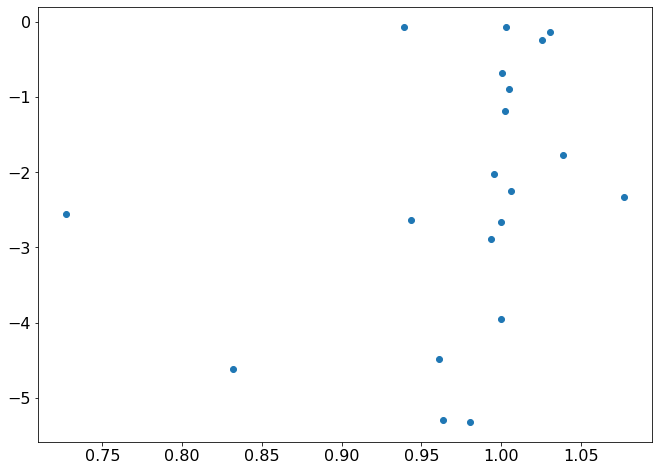

In [46]:
plt.scatter(random.asym_score,random['signal/noise'])